#Assignment 2
##Team - 09
###Vidhi Shiyani
###Komal Dodiya
###Aniket Patel

#Classification Problem Statement:
###To classify the hotspots in the five boroughs where the number of criminals aged 18 or older is significantly higher, so that the government can implement measures to reduce the conversion rate of juvenile offenders.

#Regression Problem Statement:
###To forecast future total adult arrests in each county based on historical arrest patterns and category-level arrest data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Adult_Arrests_18_and_Older_by_County___Beginning_1970_20251025.csv')

In [3]:
data.head()

,County,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,Property Misdemeanor,Other Misdemeanor
0,Albany,1970,"1,032",563,90,155,4,314,469,179,47,73,170
1,Albany,1971,"1,566",693,119,199,6,369,873,179,111,210,373
2,Albany,1972,"2,604",864,181,215,8,460,"1,740",251,295,417,777
3,Albany,1973,"3,055",955,213,230,28,484,"2,100",298,491,506,805
4,Albany,1974,"3,587","1,070",225,244,17,584,"2,517",354,610,670,883


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   County                3410 non-null   object
 1   Year                  3410 non-null   int64 
 2   Total                 3410 non-null   object
 3   Felony Total          3410 non-null   object
 4   Drug Felony           3410 non-null   object
 5   Violent Felony        3410 non-null   object
 6   DWI Felony            3410 non-null   int64 
 7   Other Felony          3410 non-null   object
 8   Misdemeanor Total     3410 non-null   object
 9   Drug Misdemeanor      3410 non-null   object
 10  DWI Misdemeanor       3410 non-null   object
 11  Property Misdemeanor  3410 non-null   object
 12  Other Misdemeanor     3410 non-null   object
dtypes: int64(2), object(11)
memory usage: 346.5+ KB


In [5]:
data.shape

(3410, 13)

In [6]:
data.describe()

,Year,DWI Felony
count,3410.000000,3410.000000
mean,1997.000000,66.691202
std,15.876836,88.229111
min,1970.000000,0.000000
25%,1983.000000,17.000000
50%,1997.000000,37.000000
75%,2011.000000,76.000000
max,2024.000000,613.000000


In [7]:
#All the arrest numbers are in numeric form but are falling in object data type cause of ','
cols_to_convert = ['Total', 'Felony Total', 'Violent Felony', 'Drug Felony', 'Other Felony',
                   'Misdemeanor Total', 'Drug Misdemeanor', 'DWI Misdemeanor',
                   'Property Misdemeanor', 'Other Misdemeanor']

#Converting columns to numeric
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

In [8]:
data.describe()

,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,Property Misdemeanor,Other Misdemeanor
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,1997.000000,6550.714663,2253.343402,484.873900,689.278886,66.691202,1012.499413,4297.371261,842.214076,607.438123,1314.604106,1533.114956
std,15.876836,14639.039331,5668.126720,1639.929453,1935.523970,88.229111,2305.751504,9319.964616,3005.251197,834.888112,3178.721826,3148.149141
min,1970.000000,22.000000,6.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,1.000000
25%,1983.000000,871.500000,194.000000,19.000000,39.000000,17.000000,106.000000,665.000000,26.000000,173.000000,154.000000,242.000000
50%,1997.000000,1519.500000,372.500000,50.000000,78.000000,37.000000,203.000000,1178.500000,75.000000,323.500000,324.000000,448.500000
75%,2011.000000,4196.500000,1114.500000,184.750000,265.000000,76.000000,588.000000,3032.250000,254.000000,654.750000,839.500000,1163.250000
max,2024.000000,107786.000000,44632.000000,17442.000000,16217.000000,613.000000,15467.000000,73365.000000,29471.000000,8954.000000,33334.000000,24875.000000


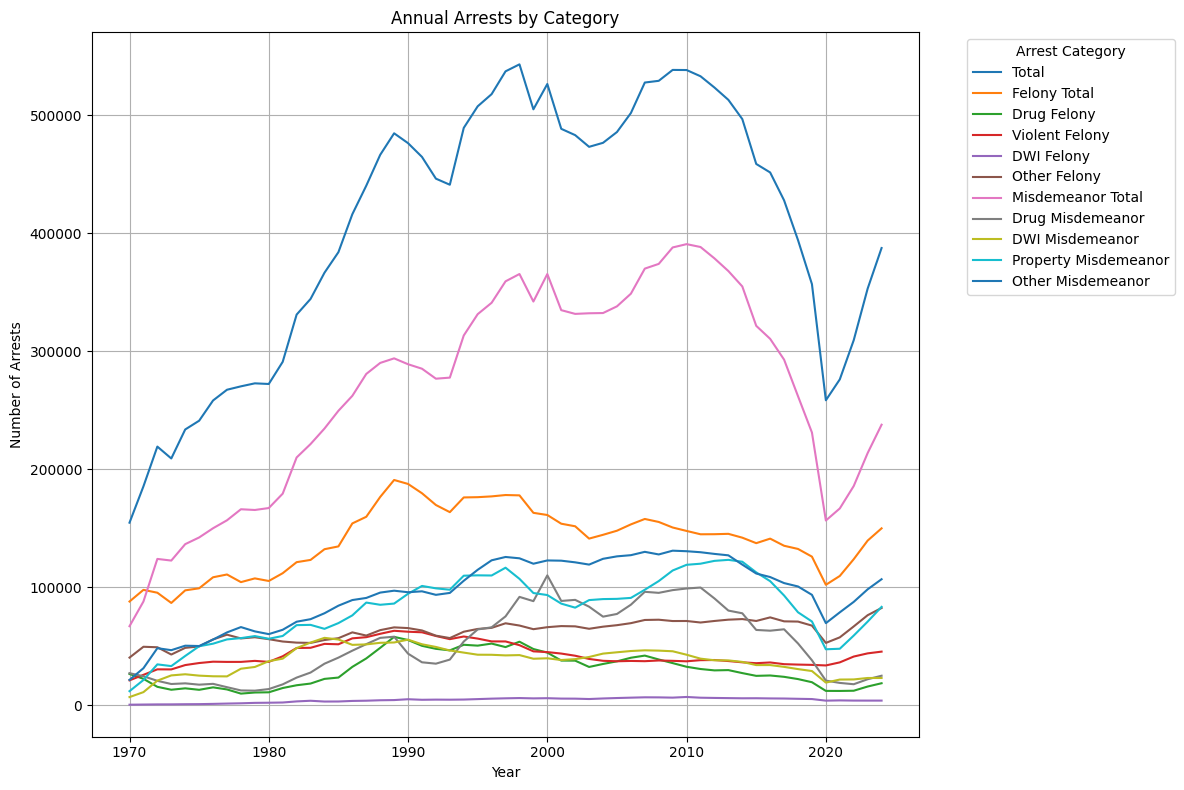

In [9]:
#Grouping data by year and sum the arrest categories
annual_arrests = data.groupby('Year')[['Total', 'Felony Total', 'Drug Felony', 'Violent Felony',
                                       'DWI Felony', 'Other Felony', 'Misdemeanor Total',
                                       'Drug Misdemeanor', 'DWI Misdemeanor', 'Property Misdemeanor',
                                       'Other Misdemeanor']].sum()

plt.figure(figsize=(12, 8))
annual_arrests.plot(kind='line', ax=plt.gca())
plt.title('Annual Arrests by Category')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(title='Arrest Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
data.isnull().sum()

,0
County,0
Year,0
Total,0
Felony Total,0
Drug Felony,0
Violent Felony,0
DWI Felony,0
Other Felony,0
Misdemeanor Total,0
Drug Misdemeanor,0


In [11]:
grouped_data = data.groupby(['County', 'Year']).sum()
display(grouped_data.head())

Total  Felony Total  Drug Felony  Violent Felony  DWI Felony  \
County Year                                                                 
Albany 1970   1032           563           90             155           4   
       1971   1566           693          119             199           6   
       1972   2604           864          181             215           8   
       1973   3055           955          213             230          28   
       1974   3587          1070          225             244          17   

             Other Felony  Misdemeanor Total  Drug Misdemeanor  \
County Year                                                      
Albany 1970           314                469               179   
       1971           369                873               179   
       1972           460               1740               251   
       1973           484               2100               298   
       1974           584               2517               354   

             DWI Misdemeanor  Property Misdemeanor  Other Misdemeanor  
County Year                                                            
Albany 1970               47                    73                170  
       1971              111                   210                373  
       1972              295                   417                777  
       1973              491                   506                805  
       1974              610                   670                883

In [12]:
grouped_data = grouped_data.reset_index()
grouped_data = grouped_data.sort_values(by=['County', 'Year'])

grouped_data['Total_Arrests_Lag1'] = grouped_data.groupby('County')['Total'].shift(1)
display(grouped_data.head())

,County,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,Property Misdemeanor,Other Misdemeanor,Total_Arrests_Lag1
0,Albany,1970,1032,563,90,155,4,314,469,179,47,73,170,NaN
1,Albany,1971,1566,693,119,199,6,369,873,179,111,210,373,1032.0
2,Albany,1972,2604,864,181,215,8,460,1740,251,295,417,777,1566.0
3,Albany,1973,3055,955,213,230,28,484,2100,298,491,506,805,2604.0
4,Albany,1974,3587,1070,225,244,17,584,2517,354,610,670,883,3055.0


In [13]:
grouped_data_encoded = pd.get_dummies(grouped_data, columns=['County'], drop_first=True)
display(grouped_data_encoded.head())

,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,...,County_Sullivan,County_Tioga,County_Tompkins,County_Ulster,County_Warren,County_Washington,County_Wayne,County_Westchester,County_Wyoming,County_Yates
0,1970,1032,563,90,155,4,314,469,179,47,...,False,False,False,False,False,False,False,False,False,False
1,1971,1566,693,119,199,6,369,873,179,111,...,False,False,False,False,False,False,False,False,False,False
2,1972,2604,864,181,215,8,460,1740,251,295,...,False,False,False,False,False,False,False,False,False,False
3,1973,3055,955,213,230,28,484,2100,298,491,...,False,False,False,False,False,False,False,False,False,False
4,1974,3587,1070,225,244,17,584,2517,354,610,...,False,False,False,False,False,False,False,False,False,False


In [14]:
split_year = 2020
train_data = grouped_data_encoded[grouped_data_encoded['Year'] < split_year].copy()
test_data = grouped_data_encoded[grouped_data_encoded['Year'] >= split_year].copy()

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (3100, 74)
Testing data shape: (310, 74)


In [15]:
train_data.fillna(0, inplace=True)

test_data.fillna(0, inplace=True)

print("Training data shape after handling missing values:", train_data.shape)
print("Testing data shape after handling missing values:", test_data.shape)

Training data shape after handling missing values: (3100, 74)
Testing data shape after handling missing values: (310, 74)


In [16]:
train_data.isnull().sum()

,0
Year,0
Total,0
Felony Total,0
Drug Felony,0
Violent Felony,0
...,...
County_Washington,0
County_Wayne,0
County_Westchester,0
County_Wyoming,0


#Regression Problem Statement
###To forecast future total adult arrests in each county based on historical arrest patterns and category-level arrest data.

In [17]:
X_train = train_data.drop('Total', axis=1)
y_train = train_data['Total']

X_test = test_data.drop('Total', axis=1)
y_test = test_data['Total']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3100, 73)
y_train shape: (3100,)
X_test shape: (310, 73)
y_test shape: (310,)


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3100 entries, 0 to 3404
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  3100 non-null   int64  
 1   Total                 3100 non-null   int64  
 2   Felony Total          3100 non-null   int64  
 3   Drug Felony           3100 non-null   int64  
 4   Violent Felony        3100 non-null   int64  
 5   DWI Felony            3100 non-null   int64  
 6   Other Felony          3100 non-null   int64  
 7   Misdemeanor Total     3100 non-null   int64  
 8   Drug Misdemeanor      3100 non-null   int64  
 9   DWI Misdemeanor       3100 non-null   int64  
 10  Property Misdemeanor  3100 non-null   int64  
 11  Other Misdemeanor     3100 non-null   int64  
 12  Total_Arrests_Lag1    3100 non-null   float64
 13  County_Allegany       3100 non-null   bool   
 14  County_Bronx          3100 non-null   bool   
 15  County_Broome         3100

##Linear Regression


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


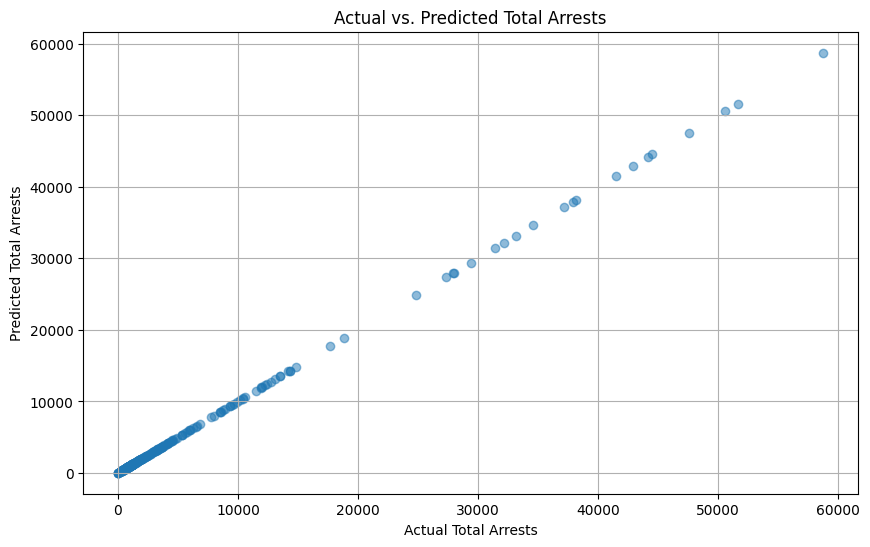

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Total Arrests")
plt.ylabel("Predicted Total Arrests")
plt.title("Actual vs. Predicted Total Arrests")
plt.grid(True)
plt.show()

X_train_cleaned shape: (3100, 63)
X_test_cleaned shape: (310, 63)

Linear Regression model retrained successfully with cleaned data.

Mean Absolute Error (MAE) with cleaned data: 678.42
Mean Squared Error (MSE) with cleaned data: 4693391.79
Root Mean Squared Error (RMSE) with cleaned data: 2166.42


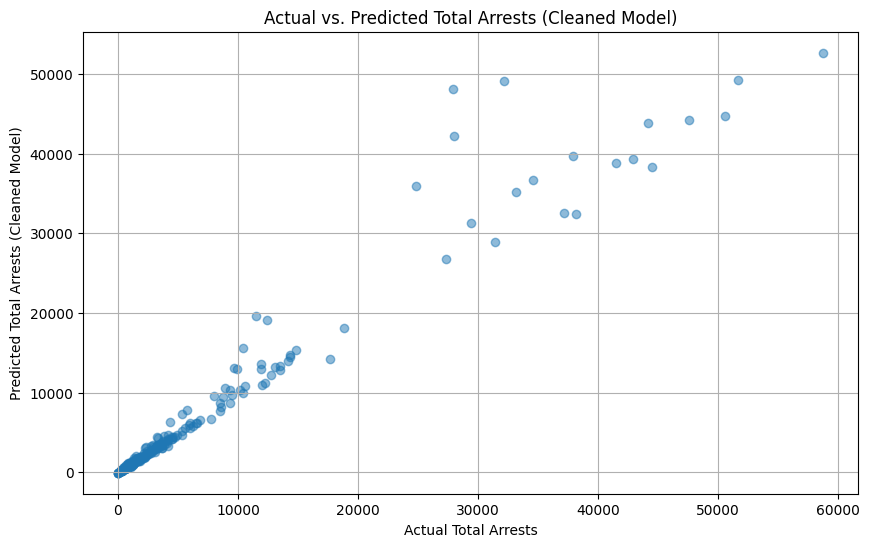

In [21]:
#Columns to remove from features due to data leakage
leakage_columns = ['Felony Total', 'Drug Felony', 'Violent Felony', 'DWI Felony',
                   'Other Felony', 'Misdemeanor Total', 'Drug Misdemeanor',
                   'DWI Misdemeanor', 'Property Misdemeanor', 'Other Misdemeanor']

X_train_cleaned = X_train.drop(leakage_columns, axis=1)
X_test_cleaned = X_test.drop(leakage_columns, axis=1)

print("X_train_cleaned shape:", X_train_cleaned.shape)
print("X_test_cleaned shape:", X_test_cleaned.shape)

model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train)

print("\nLinear Regression model retrained successfully with cleaned data.")
predictions_cleaned = model_cleaned.predict(X_test_cleaned)

mae_cleaned = mean_absolute_error(y_test, predictions_cleaned)
mse_cleaned = mean_squared_error(y_test, predictions_cleaned)
rmse_cleaned = np.sqrt(mse_cleaned)

print(f"\nMean Absolute Error (MAE) with cleaned data: {mae_cleaned:.2f}")
print(f"Mean Squared Error (MSE) with cleaned data: {mse_cleaned:.2f}")
print(f"Root Mean Squared Error (RMSE) with cleaned data: {rmse_cleaned:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_cleaned, alpha=0.5)
plt.xlabel("Actual Total Arrests")
plt.ylabel("Predicted Total Arrests (Cleaned Model)")
plt.title("Actual vs. Predicted Total Arrests (Cleaned Model)")
plt.grid(True)
plt.show()

In [22]:
# Display descriptive statistics for the 'Total' arrests in the test set
display(y_test.describe())

,Total
count,310.000000
mean,5108.729032
std,9604.374895
min,33.000000
25%,871.250000
50%,1484.000000
75%,3847.250000
max,58731.000000


###Compared to the mean of 5109 we were able to achieve an average error of 678 which is roughly 13% of the mean. Compared to the large range of values an error of 678 is relatively small.

#XG Boost


XGBoost Regressor model trained successfully.

Mean Absolute Error (MAE) with XGBoost: 888.27
Mean Squared Error (MSE) with XGBoost: 5233709.50
Root Mean Squared Error (RMSE) with XGBoost: 2287.73


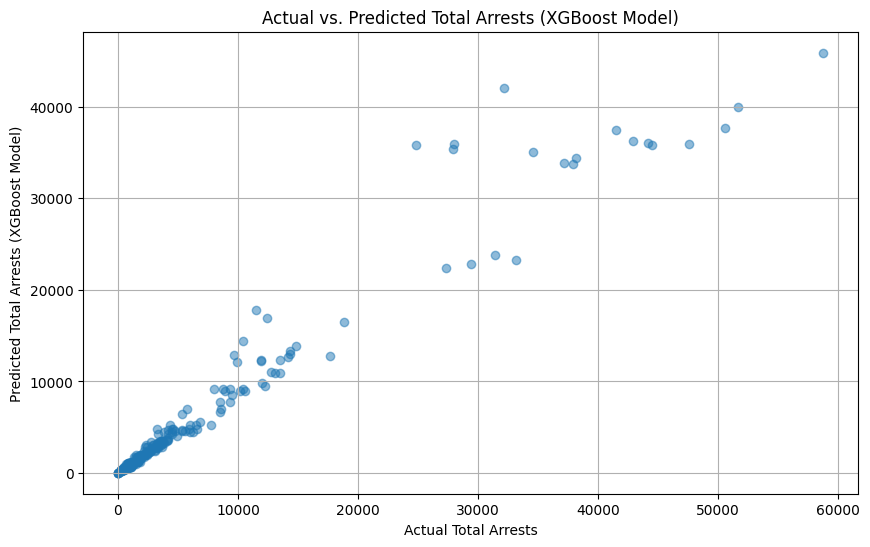

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_cleaned, y_train)

print("XGBoost Regressor model trained successfully.")
predictions_xgb = xgb_model.predict(X_test_cleaned)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"\nMean Absolute Error (MAE) with XGBoost: {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE) with XGBoost: {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE) with XGBoost: {rmse_xgb:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_xgb, alpha=0.5)
plt.xlabel("Actual Total Arrests")
plt.ylabel("Predicted Total Arrests (XGBoost Model)")
plt.title("Actual vs. Predicted Total Arrests (XGBoost Model)")
plt.grid(True)
plt.show()

###Compared to the mean of 5109 we were able to achieve an average error of 888.27 which is roughly 17.38% of the mean. Compared to the large range of values an error of 888.27 is relatively small but is higher than that of Linear Regression model.

#Comparing both Linear Regression and XG Boost Model

Model Performance Comparison:


,Model,MAE,RMSE
0,Linear Regression,678.415347,2166.423733
1,XGBoost,888.271362,2287.730207


/tmp/ipython-input-2360176581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=performance_df, palette='viridis')


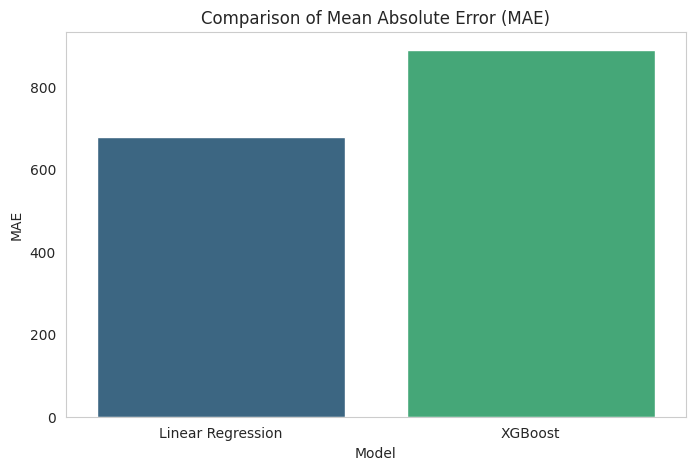

/tmp/ipython-input-2360176581.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=performance_df, palette='plasma')


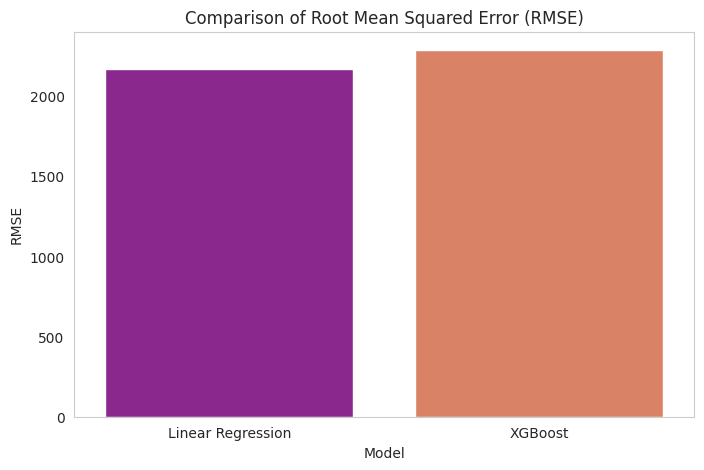

In [24]:
model_performance = {
    'Model': ['Linear Regression', 'XGBoost'],
    'MAE': [mae_cleaned, mae_xgb],
    'RMSE': [rmse_cleaned, rmse_xgb]
}
performance_df = pd.DataFrame(model_performance)

print("Model Performance Comparison:")
display(performance_df)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MAE', data=performance_df, palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=performance_df, palette='plasma')
plt.title('Comparison of Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.show()
sns.set_style("white")

#Classification Problem Statement:
To classify the hotspots in the county's where the number of criminals aged 18 or older is significantly higher, so that the government can implement measures to reduce the conversion rate of juvenile offenders.

#Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

hotspot_threshold = data['Total'].quantile(0.75)
data['Hotspot'] = (data['Total'] > hotspot_threshold).astype(int)

classification_features = data.drop(['Total', 'Hotspot', 'Felony Total', 'Drug Felony', 'Violent Felony', 'DWI Felony',
                                   'Other Felony', 'Misdemeanor Total', 'Drug Misdemeanor',
                                   'DWI Misdemeanor', 'Property Misdemeanor', 'Other Misdemeanor'], axis=1)

classification_features_encoded = pd.get_dummies(classification_features, columns=['County'], drop_first=True)

classification_target = data['Hotspot']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(classification_features_encoded,
                                                                    classification_target,
                                                                    test_size=0.2,
                                                                    random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cls, y_train_cls)

predictions_rf = rf_model.predict(X_test_cls)

accuracy_rf = accuracy_score(y_test_cls, predictions_rf)
report_rf = classification_report(y_test_cls, predictions_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(report_rf)

Random Forest Classifier Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       503
           1       0.98      0.91      0.94       179

    accuracy                           0.97       682
   macro avg       0.97      0.95      0.96       682
weighted avg       0.97      0.97      0.97       682



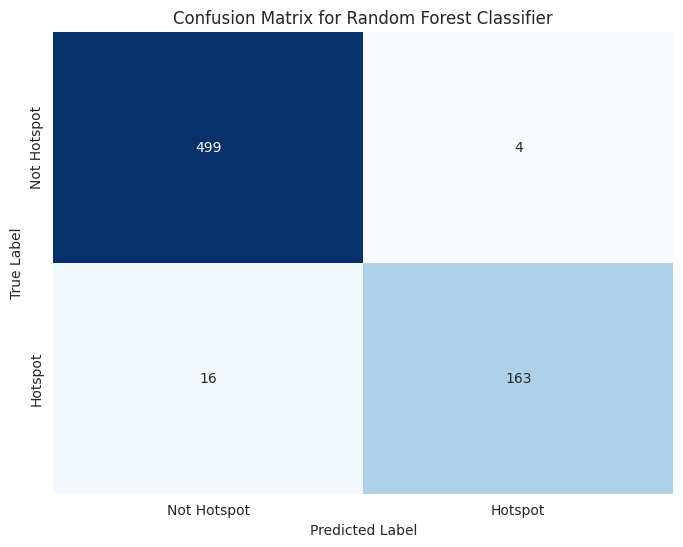

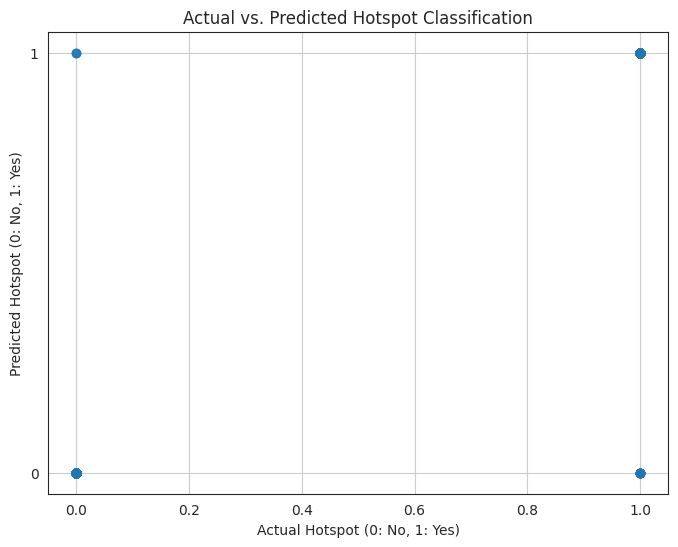

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cls, predictions_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Hotspot', 'Hotspot'], yticklabels=['Not Hotspot', 'Hotspot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_cls, predictions_rf, alpha=0.5)
plt.xlabel("Actual Hotspot (0: No, 1: Yes)")
plt.ylabel("Predicted Hotspot (0: No, 1: Yes)")
plt.title("Actual vs. Predicted Hotspot Classification")
plt.yticks([0, 1])
plt.grid(True)
plt.show()

/tmp/ipython-input-3565620354.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')


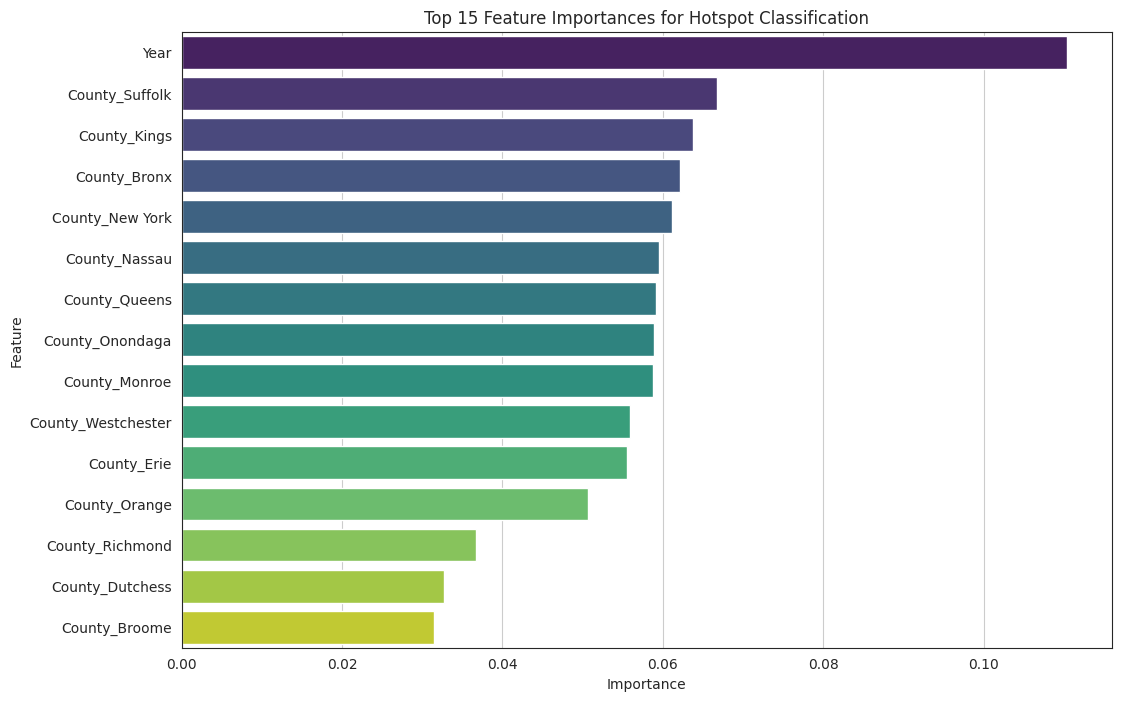

In [27]:
feature_importances = rf_model.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X_train_cls.columns)
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

top_n = 15
top_feature_importances = sorted_feature_importances.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances for Hotspot Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

In [32]:
hotspot_counts = data.groupby('County')['Hotspot'].mean()
ranked_counties = hotspot_counts.sort_values(ascending=False)

print("Counties Ranked by Proportion of Years as Hotspots:")
display(ranked_counties)

Counties Ranked by Proportion of Years as Hotspots:


,Hotspot
County,
Bronx,1.0
Erie,1.0
Kings,1.0
Nassau,1.0
Queens,1.0
...,...
Tompkins,0.0
Washington,0.0
Wayne,0.0


#Logistic Regression Classification


Logistic Regression model trained successfully.

Logistic Regression Classifier Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       503
           1       0.88      0.79      0.83       179

    accuracy                           0.92       682
   macro avg       0.90      0.87      0.89       682
weighted avg       0.92      0.92      0.91       682



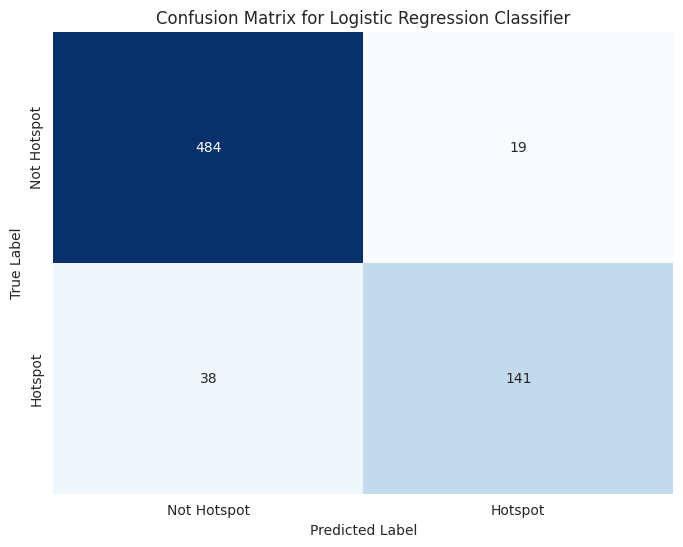

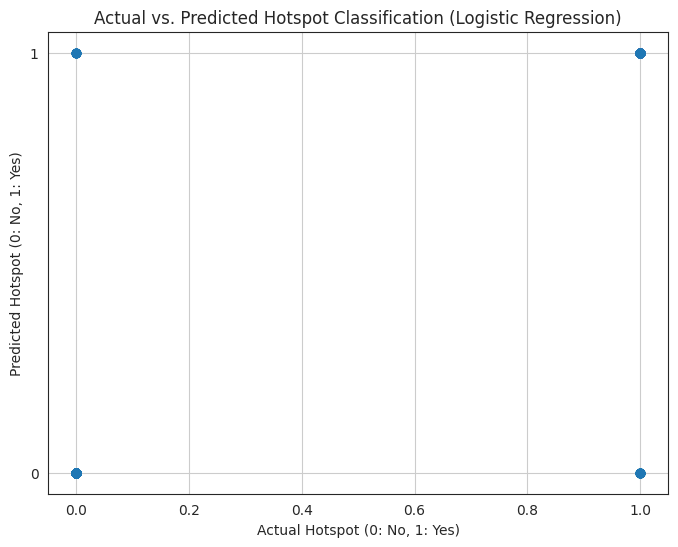

In [34]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, solver='liblinear') #Using 'liblinear' solver as it's good for small datasets and handles L2 regularization by default
logreg_model.fit(X_train_cls, y_train_cls)

print("Logistic Regression model trained successfully.")

predictions_logreg = logreg_model.predict(X_test_cls)

accuracy_logreg = accuracy_score(y_test_cls, predictions_logreg)
report_logreg = classification_report(y_test_cls, predictions_logreg)

print(f"\nLogistic Regression Classifier Accuracy: {accuracy_logreg:.2f}")
print("\nClassification Report:")
print(report_logreg)

cm_logreg = confusion_matrix(y_test_cls, predictions_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Hotspot', 'Hotspot'], yticklabels=['Not Hotspot', 'Hotspot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_cls, predictions_logreg, alpha=0.5)
plt.xlabel("Actual Hotspot (0: No, 1: Yes)")
plt.ylabel("Predicted Hotspot (0: No, 1: Yes)")
plt.title("Actual vs. Predicted Hotspot Classification (Logistic Regression)")
plt.yticks([0, 1])
plt.grid(True)
plt.show()

#Comparing the results between Random Forest Classifier and Logisitic Regression

Classification Model Performance Comparison:


,Model,Accuracy,Precision (Hotspot),Recall (Hotspot),F1-score (Hotspot)
0,Random Forest,0.970674,0.98,0.91,0.94
1,Logistic Regression,0.916422,0.88,0.79,0.83


/tmp/ipython-input-3404063663.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=classification_performance_df, palette='viridis')


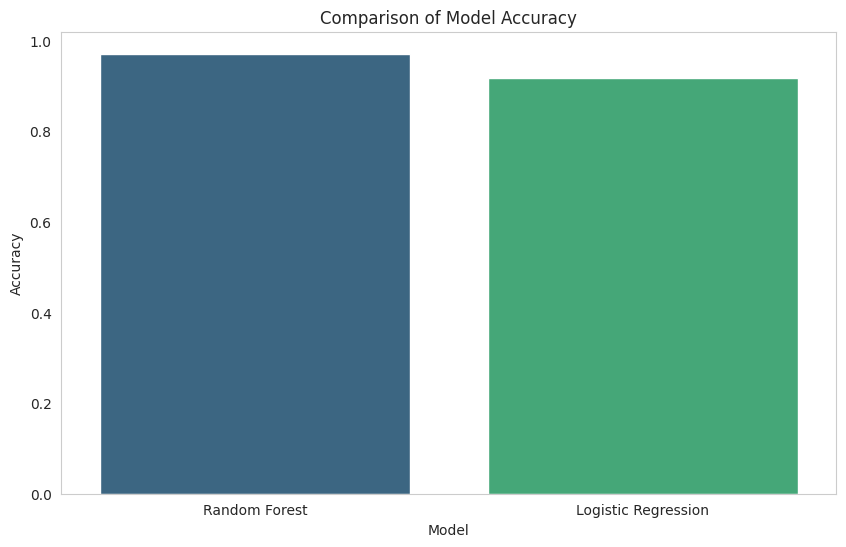

/tmp/ipython-input-3404063663.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (Hotspot)', data=classification_performance_df, palette='plasma')


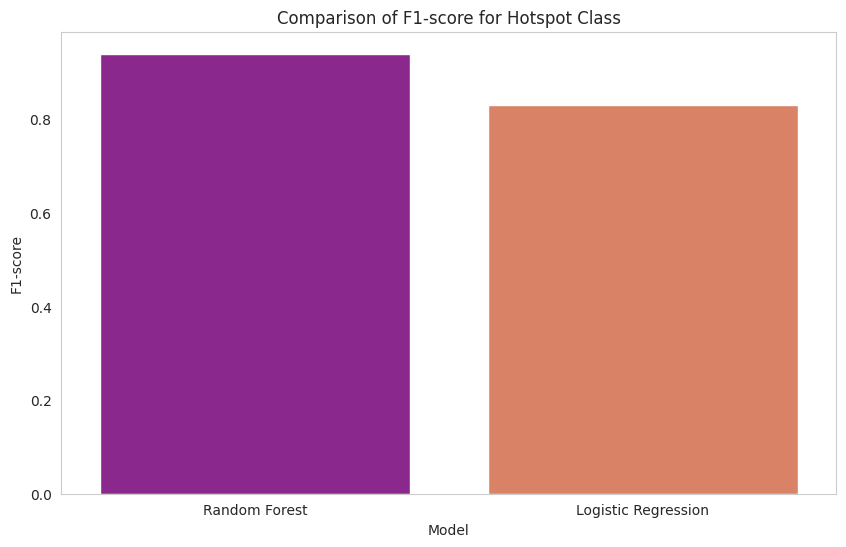

/tmp/ipython-input-3404063663.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Hotspot)', data=classification_performance_df, palette='magma')


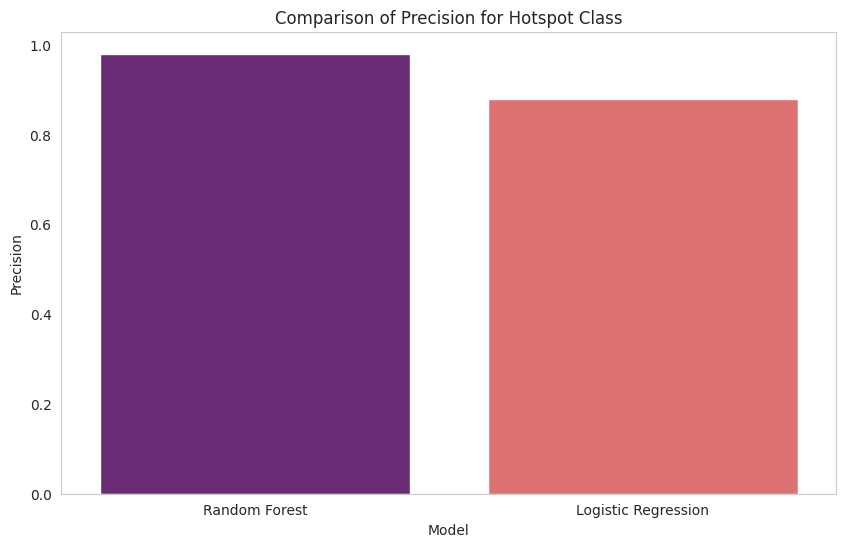

/tmp/ipython-input-3404063663.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (Hotspot)', data=classification_performance_df, palette='cividis')


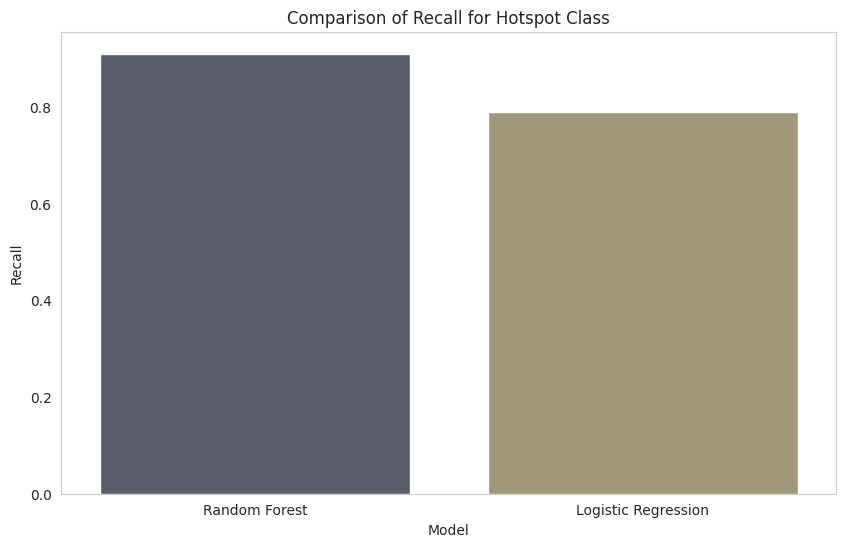

In [36]:
report_rf_lines = report_rf.splitlines()
rf_hotspot_metrics = [line for line in report_rf_lines if line.strip().startswith('1')][0].split()

report_logreg_lines = report_logreg.splitlines()
logreg_hotspot_metrics = [line for line in report_logreg_lines if line.strip().startswith('1')][0].split()


classification_performance = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_rf, accuracy_logreg],
    'Precision (Hotspot)': [float(rf_hotspot_metrics[1]), float(logreg_hotspot_metrics[1])],
    'Recall (Hotspot)': [float(rf_hotspot_metrics[2]), float(logreg_hotspot_metrics[2])],
    'F1-score (Hotspot)': [float(rf_hotspot_metrics[3]), float(logreg_hotspot_metrics[3])]
}
classification_performance_df = pd.DataFrame(classification_performance)

print("Classification Model Performance Comparison:")
display(classification_performance_df)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=classification_performance_df, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (Hotspot)', data=classification_performance_df, palette='plasma')
plt.title('Comparison of F1-score for Hotspot Class')
plt.ylabel('F1-score')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision (Hotspot)', data=classification_performance_df, palette='magma')
plt.title('Comparison of Precision for Hotspot Class')
plt.ylabel('Precision')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall (Hotspot)', data=classification_performance_df, palette='cividis')
plt.title('Comparison of Recall for Hotspot Class')
plt.ylabel('Recall')
plt.grid(axis='y')
plt.show()

sns.set_style("white")